<font face="Times New Roman" size=5><div dir=rtl align=center>
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br> <br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Computer
</font>
<br> <br>
<font color="#008080" size=5>
Introduction to Machine Learning
</font>

<hr/> <br>
<font color="#800080" size=6>
Chapter 2: Validation
<br>
</font>
<br>
<font face="Times New Roman" size=4>
:authors <br>
<b>Peyman Naseri - Alireza Gargoori Motlaq - Alireza Heydari - Seyyed Alireza Ghazanfari</b>
</font>
<hr>
</div></font>

<font  size=5><div dir=ltr>
<font face="Times New Roman" color="#008080" size=5>**Table of Contents**</font>
<br>

<font size=4>
<ul>
    <li>
        <a href="#0">
            0. Dataset
        </a>
    </li>
    <li>
        <a href="#1">
            1. Validation
        </a>
    </li>
    <ul>
        <li>
            <a href="#1-1">
                1-1. Accuracy
            </a>
        </li>
        <li>
            <a href="#1-2">
                1-2. Confusion Matrix
            </a>
        </li>
        <ul>
            <li>
                <a href="#1-2-1">1-2-1. Precision</a>
            </li>
            <li>
                <a href="#1-2-2">1-2-2. Recall</a>
            </li>
            <li>
                <a href="#1-2-3">1-2-3. F1 Score</a>
            </li>
        </ul>
        <li>
            <a href="#1-3">
                1-3. Precision/Recall Tradeoff
            </a>
        </li>
        <li>
            <a href="#1-4">
                1-4. ROC
            </a>
        </li>
        <ul>
            <li><a href="#1-4-1">1-4-1. AUC</a></li>
        </ul>
    </ul>
</ul>
</div>

<font face="Times New Roman"><div id="0">
# <font color="#800080" size=6>**0. Dataset**</font>
</div>

##### <font color="#008080" face="Times New Roman" size=4> - Introduction to Dataset </font>

<font face="Times New Roman" size=3>
The MNIST dataset includes 70,000 images of handwritten single digits.
</font>

##### <font color="#008080" face="Times New Roman" size=4> - Loading Dataset </font>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##### <font color="#008080" face="Times New Roman" size=4> - Pre-Processing Dataset</font>

In [2]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


##### <font color="#008080" face="Times New Roman" size=4> - Visualizing Dataset</font>

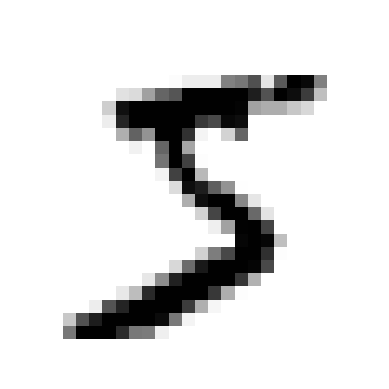

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")


digit = X[0]
plot_digit(digit)

<font face="Times New Roman"><div id="1">
# <font color="#800080" size=6>**1. Validation**</font>
</div>

#### <font color="#008080" face="Times New Roman" size=4>**Binary Classifier Training**</font>

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5

array([False, False, False, ..., False, False, False])

In [5]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', C = 0.03, random_state=42)
svm_clf.fit(X_train, y_train_5)

SVC(C=0.03, random_state=42)

#### <font color="#008080" face="Times New Roman" size=4>**Evaluation**</font>

##### <font color="#008080" face="Times New Roman" size=4> - Prediction</font>

In [6]:
svm_clf.predict([digit])

array([ True])

<font face="Times New Roman"><div id="1-1">
## <font color="#800080" size=6>**1-1. Accuracy**</font>
</div>

In [7]:
from sklearn.metrics import accuracy_score

svm_clf_predictions = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, svm_clf_predictions)

print("Accuracy of the 5 classifier is:", accuracy)

Accuracy of the 5 classifier is: 0.9729714285714286


In [8]:
# upper code had good acc but see this classifier too. It classify each input as a not 5 number.
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
never_5_clf_predictions = never_5_clf.predict(X_test)
# pay attention about 10% of inputs are 5 so we should get around 90% accuracy for this one too.
accuracy_score(y_test_5, never_5_clf_predictions)

0.9081714285714285

<font face="Times New Roman"><div id="1-2">
## <font color="#800080" size=6>**1-2. Confusion Matrix**</font>
</div>

In [9]:
from sklearn.metrics import confusion_matrix
# confusion matrix
#  -----------------
# |   TN   |  FP    |
# ------------------
# |   FN   |  TP    |
#  -----------------
svm_confusion_matrix = confusion_matrix(y_test_5, svm_clf_predictions)
print(svm_confusion_matrix)

[[15887     6]
 [  467  1140]]


<font face="Times New Roman"><div id="1-2-1">
### <font color="#800080" size=5>**1-2-1. Precision**</font>
Also called Specificity
</div>

In [10]:
# precision = TP / (TP + FP)
from sklearn.metrics import precision_score

svm_y_train_pred = svm_clf.predict(X_train)
print('Precision =', precision_score(y_train_5, svm_y_train_pred))

Precision = 0.9943045563549161


<font face="Times New Roman"><div id="1-2-2">
### <font color="#800080" size=5>**1-2-2. Reall**</font>
Also called Sensitivity
</div>

In [11]:
# recall = TP / (TP + FN)
from sklearn.metrics import recall_score

print('Recall =', recall_score(y_train_5, svm_y_train_pred))

Recall = 0.704844878878028


<font face="Times New Roman"><div id="1-2-3">
### <font color="#800080" size=5>**1-2-3. F1 Score**</font>
</div>

In [12]:
# f1_score = (2 * precision * recall) / (precision + recall)
from sklearn.metrics import f1_score

print("F1_score =", f1_score(y_train_5, svm_y_train_pred))

F1_score = 0.8249191743347426


<font face="Times New Roman"><div id="1-3">
## <font color="#800080" size=6>**1-3. Precision/Recall TradeOff**</font>
</div>

In [13]:
#Get the scores for train set predictions
svm_train_scores = svm_clf.decision_function(X_train)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, svm_train_scores)

thresholds

array([-2.82740324, -2.72198694, -2.66664357, ...,  1.85226769,
        1.89011781,  1.96884864])

#### <font color="#008080" face="Times New Roman" size=4>**Visualizing**</font>

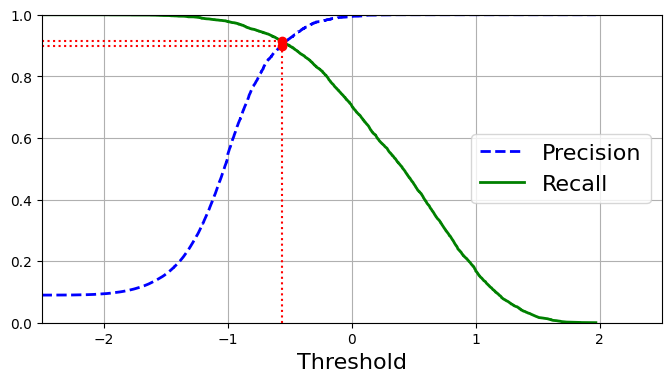

In [14]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-2.5, 2.5, 0, 1])



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-2.5, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-2.5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

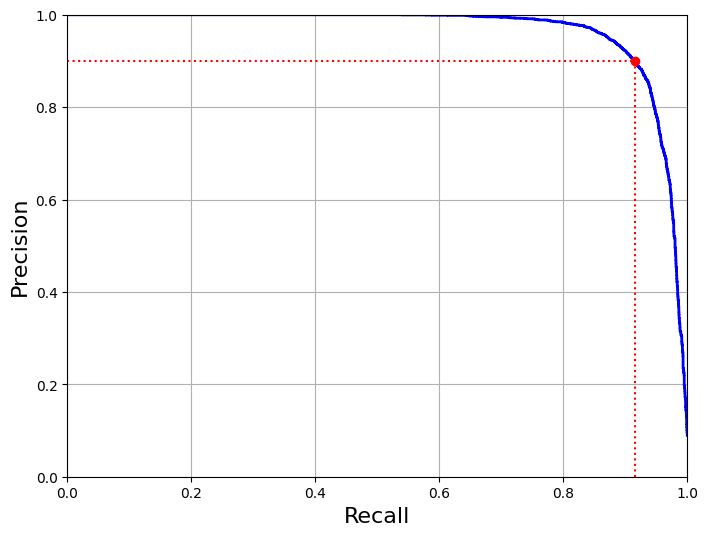

In [15]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

#### <font color="#008080" face="Times New Roman" size=4>**Test**</font>

In [16]:
# find a suitable condition for achieving 90% recall based on trade off and check the result
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]
print("Threshold value for 90% recall =", threshold_90_recall)

svm_y_train_pred_90 = (svm_train_scores >= threshold_90_precision)
print("Precision =", precision_score(y_train_5, svm_y_train_pred_90))
print("Recall =", recall_score(y_train_5, svm_y_train_pred_90))

Threshold value for 90% recall = -2.8274032359600163
Precision = 0.9001044932079415
Recall = 0.9152146196345091


<font face="Times New Roman"><div id="1-4">
## <font color="#800080" size=6>**1-4. ROC (ROC Curve)**</font>
</div>

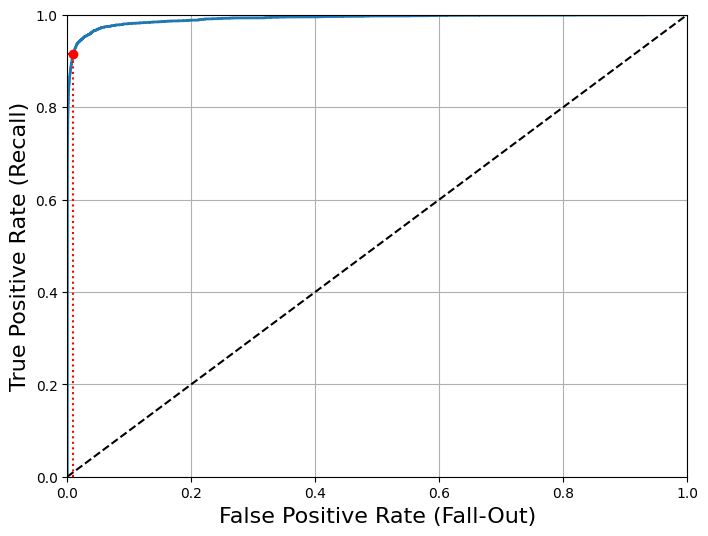

In [17]:
# it is like precision-recall curve, it shows recall based on false positive rate
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, svm_train_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

<font face="Times New Roman"><div id="1-4-1">
### <font color="#800080" size=5>**1-4-1. AUC**</font>
</div>

In [18]:
from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_train_5, svm_train_scores))

AUC = 0.9916184997517591
